In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

In [2]:
train = pd.read_csv('../data/train/arabica_train.csv')
test = pd.read_csv('../data/test/arabica_test.csv')

In [3]:
Xtrain = train.drop(columns='Calidad')
ytrain = train.Calidad

print(Xtrain.shape)
print(ytrain.shape)

(2468, 9)
(2468,)


In [4]:
Xtest = test.drop(columns='Calidad')
ytest = test.Calidad

print(Xtest.shape)
print(ytest.shape)

(617, 9)
(617,)


In [5]:
best_params = {'selectkbest__k': 9,
               'pca__n_components': 9,
               'classifier': GradientBoostingClassifier(max_depth=7, max_features=2)}

In [6]:
best_model = Pipeline(steps=[("selectkbest", SelectKBest(k=best_params['selectkbest__k'])),
                             ("pca", PCA(n_components=best_params['pca__n_components'])),
                             ("classifier", best_params['classifier'])])

In [7]:
best_model.fit(Xtrain, ytrain)

Pipeline(steps=[('selectkbest', SelectKBest(k=9)), ('pca', PCA(n_components=9)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=7, max_features=2))])

In [8]:
predicciones = best_model.predict(Xtest)
print('Accuracy:', metrics.accuracy_score(predicciones, ytest))
print('Precision:', metrics.precision_score(predicciones, ytest, average=None))
print('Recall:', metrics.recall_score(predicciones, ytest, average=None))

Accuracy: 0.9789303079416531
Precision: [1.         0.95637584 1.        ]
Recall: [0.94512195 1.         0.97619048]


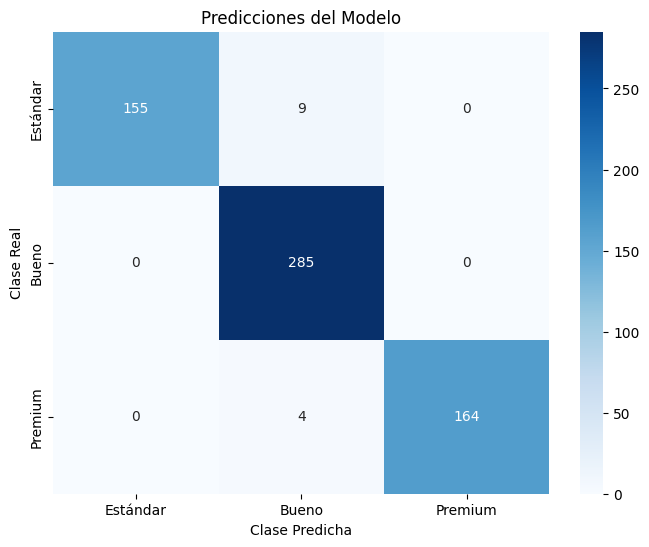

In [9]:
confusion = metrics.confusion_matrix(predicciones, ytest)
calidad = ['Estándar', 'Bueno', 'Premium']
plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels= calidad, yticklabels= calidad)
plt.title('Predicciones del Modelo')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real');